In [13]:
import sys
from pathlib import Path

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data_dir = Path.cwd().parent.joinpath('data')

In [16]:
mps = {} # mass pairs
mps[1400] = [400, 600, 800, 1000, 1200, 1300]

In [17]:
wr = 1400
n = [400, 600, 800, 1000, 1200, 1300]
eejj_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
weight_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))

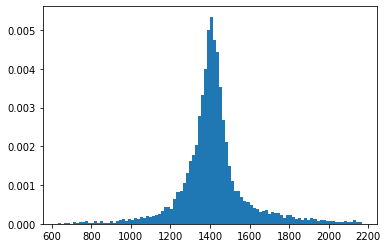

In [18]:
plt.hist(eejj_ref, range=[wr*0.45,wr*1.55], bins=100, density=True)
plt.show()

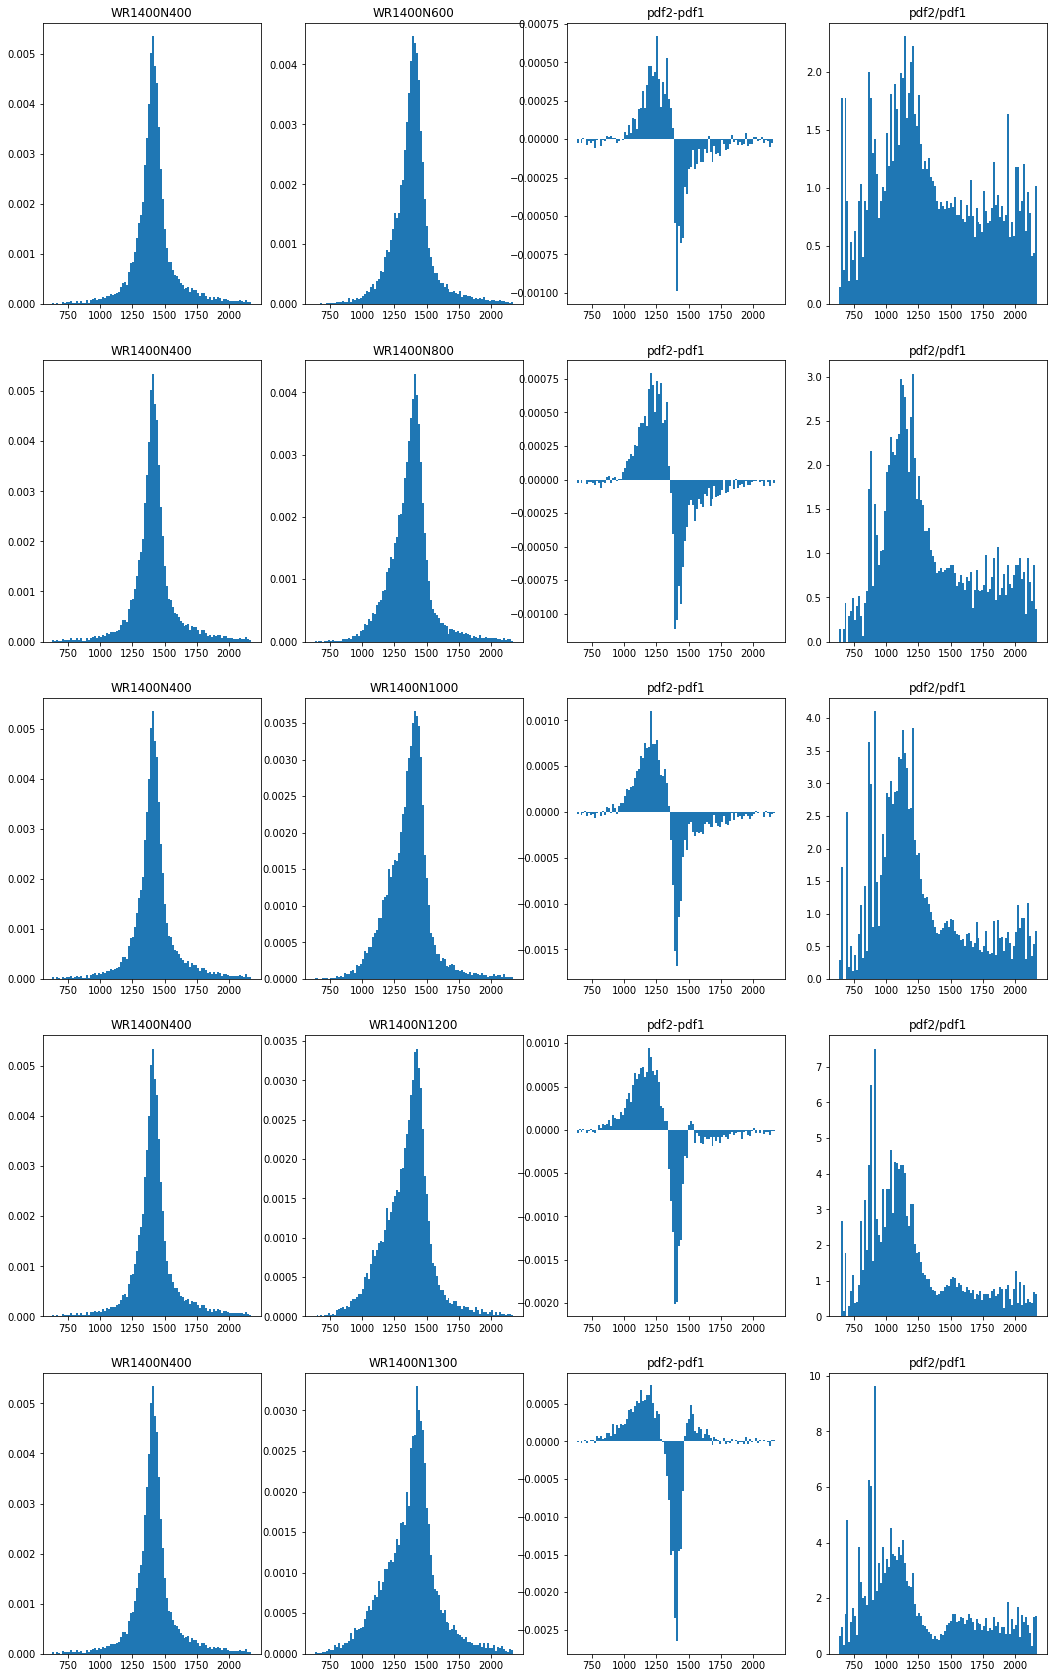

In [36]:
for wr, ns in mps.items():
    test_num = len(ns)-1
    fig, axs = plt.subplots(test_num, 4, figsize=(18, 6*test_num))
    eejj_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
    weight_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
    for i in range(1,len(ns)):
        eejj_test = np.load(data_dir.joinpath(f"WR{wr}N{n[i]}_eejjMassArray.npy"))
        weight_test = np.load(data_dir.joinpath(f"WR{wr}N{n[i]}_eejjMassArray.npy"))
        hist_ref = axs[i-1][0].hist(eejj_ref,range=[wr*0.45,wr*1.55], bins=100, density=True)
        axs[i-1][0].set(title=f"WR{wr}N{n[0]}")
        
        hist_test = axs[i-1][1].hist(eejj_test,range=[wr*0.45,wr*1.55], bins=100, density=True)
        axs[i-1][1].set(title=f"WR{wr}N{n[i]}")
        
        bar_width = hist_ref[1][1]-hist_ref[1][0]
        axs[i-1][2].bar(x=hist_ref[1][:-1], height=(hist_test[0]-hist_ref[0]), width=bar_width, align='edge')
        axs[i-1][2].set(title="pdf2-pdf1")
        
        axs[i-1][3].bar(x=hist_ref[1][:-1], height=(hist_test[0]/hist_ref[0]), width=bar_width, align='edge')
        axs[i-1][3].set(title="pdf2/pdf1")
plt.show()

In [20]:
# print(hist_test[1][:-1])

In [21]:
# np.fft.fft(eejj_ref)

In [22]:
from scipy.signal import deconvolve

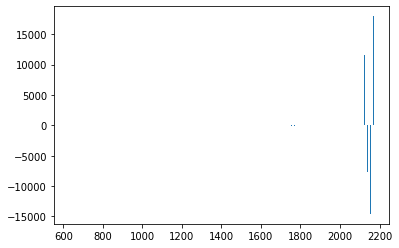

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.42387776e-01  5.35325268e-02
 -3.30116011e-01  2.69149661e-01  9.63333401e-01 -6.49782733e-01
 -5.41771999e-01  2.00238206e+00  9.29518958e-01 -3.16149358e+00
  1.82388134e+00  4.72800

In [37]:
signal_padded = np.zeros(200, dtype=float)
signal_padded[50:150]=hist_test[0]
Filter, filter_remainder = deconvolve(signal=signal_padded, divisor=hist_ref[0])
plt.bar(x=hist_ref[1], height=Filter)
plt.show()
print(Filter)
print(filter_remainder)

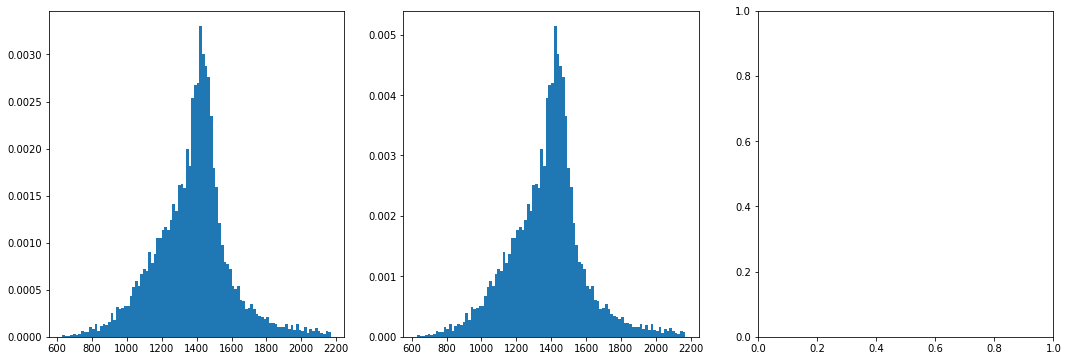

In [12]:
recover, remainder = deconvolve(signal=hist_test[0], divisor=Filter)
bar_width = hist_ref[1][1]-hist_ref[1][0]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
ax1.hist(eejj_test,range=[wr*0.45,wr*1.55], bins=100, density=True)
ax2.bar(x=hist_ref[1][:-1], height=recover, width=bar_width, align='edge')
plt.show()